# Laboratorio 2: Exploración y Visualización de Datos
Fecha: Marzo 2024

Integrantes: Vicente Leyton C. (seccion 1) - Andrés Salazar C. (seccion 1)


## Declaración de compromiso ético

Nosotros/as **Vicente Leyton C. - Andrés Salazar C.**, declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.

## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. Puede ocupar Jupyter notebook en su computador o usar Google Colab como alternativa online.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

# Práctica

## Accidentes de tránsito

Para esta sección utilizaremos un dataset real de número de accidentes de tránsito por localidad, el cual puede ser encontrado en el siguiente link: http://datos.gob.cl/dataset/9348. Para cargar el dataset ejecute el siguiente código:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
tipos = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/accidentes_2010_2011.txt", sep=" ")
tipos.head()

,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
1,Nacional,Nacional,2010,Atropello,8247
2,Nacional,Nacional,2011,Atropello,8339
3,Regional,XV Región Arica y Parinacota,2010,Atropello,115
4,Regional,XV Región Arica y Parinacota,2011,Atropello,159
5,Comunal,ARICA,2010,Atropello,115


Explore el set de datos para responder las siguientes preguntas:

1. ¿Cuáles son las dimensiones del dataset (filas, columnas)? (Recuerde adjuntar código).

In [6]:
dim = tipos.shape
dim

(4296, 5)

Las dimensiones para el dataframe de anime son (4296, 5). Ocupamos de código fuente el Tutorial_2.ipynb

In [ ]:
'''
# The dimensions of the dataframe as a (rows, cols) tuple
mtcars_df.shape
'''

2. ¿Qué describe cada línea del dataset? (ejemplifique tomando el dato de la fila 235, extienda la descripción)

In [8]:
fila = tipos[234:235]
fila

,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
235,Comunal,PALMILLA,2010,Atropello,4


Cada línea del dataset describe la cantidad de algún tipo de accidente dado el año y en este caso, comuna. Pudiendo ser también la región que se ocupará más adelante. Ocupamos de código fuente el Tutorial_2.ipynb

In [ ]:
'''
# Converts the frame to a two-dimensional table
# we use [0:5] for printing only the first 5 examples
mtcars_df.values[0:5]
'''

3. ¿Cuántos años diferentes abarca la información del dataset? Entregue un array con los años.


In [22]:
anios = tipos['Anio'].drop_duplicates().to_numpy()
anios

array([2010, 2011], dtype=int64)

Abarca la información de dos años (2010 y 2011). Ocupamos de código fuente el Tutorial_2.ipynb y https://pandas.pydata.org/pandas-docs/version/2.1.2/reference/api/pandas.DataFrame.to_numpy.html

In [ ]:
'''
# Unique values from a column
mtcars_df.Model.drop_duplicates()
'''

4. Filtre los datos para incluir sólo los accidentes ocurridos el año 2011 a nivel Regional. Luego, genere un gráfico de barras que muestre la cantidad de accidentes en cada Región. Comente sus principales observaciones y si considera que es razonable usar el conteo de frecuencias para determinar las regiones que tuvieron más accidentes.

R: Es razonable usar el conteo de frecuencias, pero no es lo mejor, ya que se pierde información de las demás regiones al tener tanta diferencia con la región metropolitana

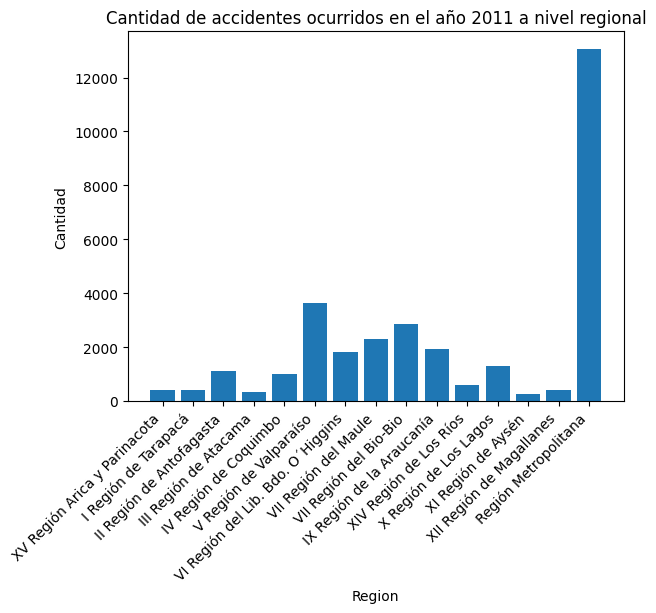

In [12]:
accidentes_regional = tipos[(tipos['Anio'] == 2011) & (tipos['Muestra'] == 'Regional')]
accidentes_regional

plt.bar(accidentes_regional['Descripcion'], accidentes_regional['Cantidad'])

# Establecer etiquetas de los ejes
plt.xlabel('Region')
plt.ylabel('Cantidad')

# Establecer título
plt.title('Cantidad de accidentes ocurridos en el año 2011 a nivel regional')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()



Ocupamos de código fuente el Tutorial_2.ipynb

In [ ]:
'''
# Filtrar los datos donde Muestra es igual a "Regional", Anio es igual a 2011 y Estado es igual a "Muertos"
afect2011 = afectados[(afectados['Muestra'] == 'Regional') &
                      (afectados['Anio'] == 2011) &
                      (afectados['Estado'] == 'Muertos')]

# Crear un gráfico de barras
plt.bar(afect2011['Descripcion'], afect2011['Cantidad'])

# Establecer etiquetas de los ejes
plt.xlabel('Descripción')
plt.ylabel('Cantidad')

# Establecer título
plt.title('Cantidad de Muertos en Accidentes Regionales en 2011')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()
'''

5. Filtre los datos para incluir sólo los accidentes ocurridos el año 2010 a nivel regional. Genere un boxplot donde se indique la cantidad de accidentes categorizado por tipo de accidente. ¿Cuáles son sus principales observaciones?

In [13]:
accidentes = tipos['TipoAccidente'].drop_duplicates().to_numpy()
list(accidentes)

['Atropello', 'Caida', 'Colision', 'Choque', 'Volcadura', 'Otros']

In [14]:
import plotly.express as px

# Filtrar los datos donde Muestra es igual a "Regional" y Anio es igual a 2011
tipos2011 = tipos[(tipos['Muestra'] == 'Regional') & (tipos['Anio'] == 2010)]
fig = px.box(tipos2011, y="Cantidad", x="TipoAccidente")
fig.show()

De nuevo la gran diferencia con respecto a la Región Metropolitana nos hace perder información al reducir tanto el tamaño de las demás cajas. Ocupamos de código fuente el Tutorial_2.ipynb

In [ ]:
'''
import plotly.express as px

# Filtrar los datos donde Muestra es igual a "Regional" y Anio es igual a 2011
tipos2011 = tipos[(tipos['Muestra'] == 'Regional') & (tipos['Anio'] == 2011)]
fig = px.box(tipos2011, x="Cantidad", y="TipoAccidente")
fig.show()
'''

6. ¿Qué otra forma de explorar los datos podría agregar para el dataset de Accidentes de tránsito y qué información adicional aporta? Adjunte el código necesario.

Anio                                  2010     2011
Descripcion                                        
I Región de Tarapacá                 870.0   1000.0
II Región de Antofagasta            1938.0   2186.0
III Región de Atacama                649.0    770.0
IV Región de Coquimbo               1947.0   2293.0
IX Región de la Araucanía           3514.0   3985.0
Región Metropolitana               21675.0  23520.0
V Región de Valparaíso              7023.0   7724.0
VI Región del Lib. Bdo. O´Higgins   3408.0   3542.0
VII Región del Bio-Bio                 0.0   6643.0
VII Región del Maule                4541.0   4390.0
VIII Región del Bio-Bio             6128.0      0.0
X Región de Los Lagos               2585.0   2965.0
XI Región de Aysén                   618.0    598.0
XII Región de Magallanes            1259.0   1020.0
XIV Región de Los Ríos               993.0   1180.0
XV Región Arica y Parinacota         598.0   1018.0


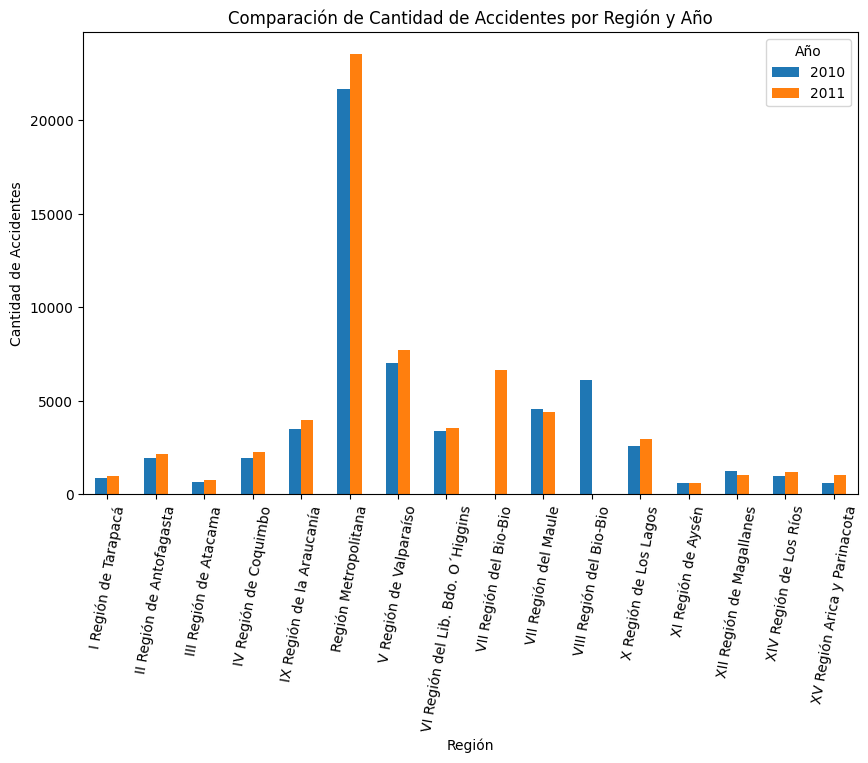

In [15]:
histograma_regional = tipos[(tipos['Muestra'] == 'Regional')]
# Agrupar los datos por región y año y sumar la cantidad para cada grupo
grouped_data = histograma_regional.groupby(['Descripcion', 'Anio'])['Cantidad'].sum().unstack().fillna(0)
print(grouped_data)

# Graficar el histograma con barras para cada región y año
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Región')
plt.ylabel('Cantidad de Accidentes')
plt.title('Comparación de Cantidad de Accidentes por Región y Año')
plt.xticks(rotation=80)
plt.legend(title='Año')
plt.show()

Con este gráfico, lo que hacemos es comparar la cantidad de accidentes por región para cada año. Pudimos identificar que la mayoría de las regiones aumentaron el número de accidentes en el año 2011. Además, nos dimos cuenta que en esos años el número de la región del Bio-Bio cambió (VII a VII). El código fue una mezcla entre conceptos del Tutorial_1.ipynb, Tutorial_2.ipynb para graficar, https://docs.kanaries.net/es/topics/Pandas/pandas-unstack para el unstack() y https://www.w3schools.com/python/pandas/ref_df_fillna.asp para el fillna(0)

## Diabetes
Considere el set de datos de pacientes para la predicción de diabetes con las siguientes columnas:

- gender: género del paciente
- age: edad del paciente
- hypertension: indica si el paciente tiene o no hipertensión
- heart_disease: indica si el paciente tiene o no enfermedad cardiaca
- smoking_history: indica si el paciente es o fue fumador
- bmi: indice de masa corporal del paciente
- HbA1c_level: Hemoglobina HbA1c del paciente
- blood_glucose_level: Nivel de glucosa en sangre del paciente
- diabetes: si el paciente tiene o no diabetes

In [16]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab1.2%202023-2/diabetes_prediction_dataset.csv")
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


7. Para explorar el dataset, realice un análisis de frecuencias de los atributos categóricos (categorías binarias y multiclase).



In [17]:
diabetes.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [18]:
print(diabetes['gender'].value_counts(dropna=True))
print(diabetes['hypertension'].value_counts(dropna=True))
print(diabetes['heart_disease'].value_counts(dropna=True))
print(diabetes['smoking_history'].value_counts(dropna=True))
print(diabetes['diabetes'].value_counts(dropna=True))


gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
hypertension
0    92515
1     7485
Name: count, dtype: int64
heart_disease
0    96058
1     3942
Name: count, dtype: int64
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
diabetes
0    91500
1     8500
Name: count, dtype: int64


Ocupamos de código fuente el Tutorial_2.ipynb

In [ ]:
'''
# would allow you to view unique values and counts for a series (like a column or a few columns).
mtcars_df['AM'].value_counts(dropna=False)
'''

8. Muestre estadísticas de resumen para las variables numéricas y comenten sus observaciones.

In [19]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Como se puede apreciar en la celda donde vemos los tipos de los atributos, todos eran numericos (int o float) excepto **smoking_history**, el cual vemos que el método describe automáticamente lo descarta para obtener el resumen. 

Podemos observar lo siguiente:
* Edad: Van desde recien nacidos hasta adultos mayores de 80 años. La mediana y la media tienen valores similares.
* Hipertensión: Aproximadamente solo el 7% de las personas sufren de hipertensión.
* Problemas cardíacos: Casi el 4% de las personas tienen problemas cardiacos.
* bmi: La mediana y la media son casi idénticas, con un valor cercano a 27 (sobrepeso). Existe un outlier máximo de 95, tomar en cuenta que mayor a 35 es obesidad extrema!. 
* HbA1c_level: El máximo es 9, y nuevamente la mediana y la media son parecidas.
* blood_glucose_level: El rango intercuartil es de 59.
* diabetes: Solo el 8.5% de las personas posee diabetes.

Ocupamos de código fuente el Tutorial_2.ipynb

In [ ]:
'''
# Displays descriptive stats for all columns
mtcars_df.describe()
'''

Y eso es todo por hoy :)


![image.png](attachment:image.png)